In [32]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

In [6]:
groceries = pd.read_csv("./Groceries_dataset.csv")

In [7]:
groceries.shape

(38765, 3)

In [8]:
groceries.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [9]:
all_transactions = [transaction[1]['itemDescription'].tolist() for transaction in list(groceries.groupby(['Member_number', 'Date']))]

In [11]:
len(all_transactions)

14963

In [12]:
all_transactions[0:10]

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [13]:
trans_encoder = TransactionEncoder() # Instanciate the encoder
trans_encoder_matrix = trans_encoder.fit(all_transactions).transform(all_transactions)
trans_encoder_matrix = pd.DataFrame(trans_encoder_matrix, columns=trans_encoder.columns_)

In [14]:
trans_encoder_matrix.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
def perform_rule_calculation(transact_items_matrix, rule_type="fpgrowth", min_support=0.001):
    """
    desc: this function performs the association rule calculation 
    @params:
        - transact_items_matrix: the transaction X Items matrix
        - rule_type: 
                    - apriori or Growth algorithms (default="fpgrowth")
                    
        - min_support: minimum support threshold value (default = 0.001)
        
    @returns:
        - the matrix containing 3 columns:
            - support: support values for each combination of items
            - itemsets: the combination of items
            - number_of_items: the number of items in each combination of items
            
        - the excution time for the corresponding algorithm
        
    """
    start_time = 0
    total_execution = 0
    
    if(not rule_type=="fpgrowth"):
        start_time = time.time()
        rule_items = apriori(transact_items_matrix, 
                       min_support=min_support, 
                       use_colnames=True)
        total_execution = time.time() - start_time
        print("Computed Apriori!")
        
    else:
        start_time = time.time()
        rule_items = fpgrowth(transact_items_matrix, 
                       min_support=min_support, 
                       use_colnames=True)
        total_execution = time.time() - start_time
        print("Computed Fp Growth!")
    
    rule_items['number_of_items'] = rule_items['itemsets'].apply(lambda x: len(x))
    
    return rule_items, total_execution

In [16]:
def compute_association_rule(rule_matrix, metric="lift", min_thresh=1):
    """
    @desc: Compute the final association rule
    @params:
        - rule_matrix: the corresponding algorithms matrix
        - metric: the metric to be used (default is lift)
        - min_thresh: the minimum threshold (default is 1)
        
    @returns:
        - rules: all the information for each transaction satisfying the given metric & threshold
    """
    rules = association_rules(rule_matrix, 
                              metric=metric, 
                              min_threshold=min_thresh)
    
    return rules

In [17]:
def plot_metrics_relationship(rule_matrix, col1, col2):
    """
    desc: shows the relationship between the two input columns 
    @params:
        - rule_matrix: the matrix containing the result of a rule (apriori or Fp Growth)
        - col1: first column
        - col2: second column
    """
    fit = np.polyfit(rule_matrix[col1], rule_matrix[col2], 1)
    fit_funt = np.poly1d(fit)
    plt.plot(rule_matrix[col1], rule_matrix[col2], 'yo', rule_matrix[col1], 
    fit_funt(rule_matrix[col1]))
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('{} vs {}'.format(col1, col2))

In [18]:
def compare_time_exec(algo1=list, alg2=list):
    """
    @desc: shows the execution time between two algorithms
    @params:
        - algo1: list containing the description of first algorithm, where
            
        - algo2: list containing the description of second algorithm, where
    """
    
    execution_times = [algo1[1], algo2[1]]
    algo_names = (algo1[0], algo2[0])
    y=np.arange(len(algo_names))
    
    plt.bar(y,execution_times,color=['orange', 'blue'])
    plt.xticks(y,algo_names)
    plt.xlabel('Algorithms')
    plt.ylabel('Time')
    plt.title("Execution Time (seconds) Comparison")
    plt.show()

In [19]:
val = {'name':12}
value = list(val.items())[0]

In [20]:
value

('name', 12)

Case 1: Using FP Growth Algorithm

In [22]:
fpgrowth_matrix, fp_growth_exec_time = perform_rule_calculation(trans_encoder_matrix) # Run the algorithm
print("Fp Growth execution took: {} seconds".format(fp_growth_exec_time))

Computed Fp Growth!
Fp Growth execution took: 0.5777206420898438 seconds


In [23]:
fpgrowth_matrix.head()

,support,itemsets,number_of_items
0,0.157923,(whole milk),1
1,0.085879,(yogurt),1
2,0.060349,(sausage),1
3,0.009490,(semi-finished bread),1
4,0.051728,(pastry),1


In [24]:
fpgrowth_matrix.tail()

,support,itemsets,number_of_items
745,0.001403,"(chewing gum, yogurt)",2
746,0.001069,"(other vegetables, chewing gum)",2
747,0.001002,"(chewing gum, soda)",2
748,0.001069,"(pasta, whole milk)",2
749,0.001002,"(seasonal products, rolls/buns)",2


Lift

In [25]:
fp_growth_rule_lift = compute_association_rule(fpgrowth_matrix)

In [26]:
fp_growth_rule_lift.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(yogurt, rolls/buns)",(whole milk),0.007819,0.157923,0.001337,0.170940,1.082428,0.000102,1.015701
1,"(yogurt, whole milk)",(rolls/buns),0.011161,0.110005,0.001337,0.119760,1.088685,0.000109,1.011083
2,"(rolls/buns, whole milk)",(yogurt),0.013968,0.085879,0.001337,0.095694,1.114293,0.000137,1.010854
3,(yogurt),"(rolls/buns, whole milk)",0.085879,0.013968,0.001337,0.015564,1.114293,0.000137,1.001622
4,(rolls/buns),"(yogurt, whole milk)",0.110005,0.011161,0.001337,0.012151,1.088685,0.000109,1.001002


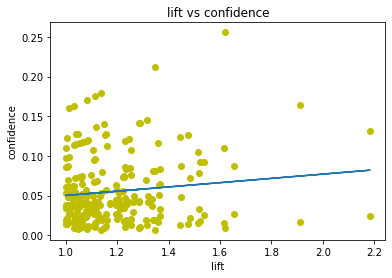

In [33]:
plot_metrics_relationship(fp_growth_rule_lift, col1='lift', col2='confidence')

In [34]:
fp_growth_rule = compute_association_rule(fpgrowth_matrix, metric="confidence", min_thresh=0.2)
fp_growth_rule.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541
1,"(rolls/buns, sausage)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,0.000292,1.069304


Case 2: Using Apriori Algorithm

In [35]:
apriori_matrix, apriori_exec_time = perform_rule_calculation(trans_encoder_matrix, rule_type="apriori")
print("Apriori Execution took: {} seconds".format(apriori_exec_time))

Computed Apriori!
Apriori Execution took: 7.330033779144287 seconds


In [36]:
apriori_matrix.head()

,support,itemsets,number_of_items
0,0.004010,(Instant food products),1
1,0.021386,(UHT-milk),1
2,0.001470,(abrasive cleaner),1
3,0.001938,(artif. sweetener),1
4,0.008087,(baking powder),1


In [37]:
apriori_matrix.tail()

,support,itemsets,number_of_items
745,0.001136,"(rolls/buns, whole milk, sausage)",3
746,0.001002,"(rolls/buns, soda, whole milk)",3
747,0.001337,"(yogurt, rolls/buns, whole milk)",3
748,0.001069,"(soda, whole milk, sausage)",3
749,0.001470,"(yogurt, whole milk, sausage)",3


Lift

In [38]:
apriori_rule_lift = compute_association_rule(apriori_matrix)

In [39]:
apriori_rule_lift.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(UHT-milk),(tropical fruit),0.021386,0.067767,0.001537,0.071875,1.060617,8.785064e-05,1.004426
1,(tropical fruit),(UHT-milk),0.067767,0.021386,0.001537,0.022682,1.060617,8.785064e-05,1.001326
2,(brown bread),(beef),0.037626,0.033950,0.001537,0.040853,1.203301,2.597018e-04,1.007196
3,(beef),(brown bread),0.033950,0.037626,0.001537,0.045276,1.203301,2.597018e-04,1.008012
4,(beef),(citrus fruit),0.033950,0.053131,0.001804,0.053150,1.000349,6.297697e-07,1.000020


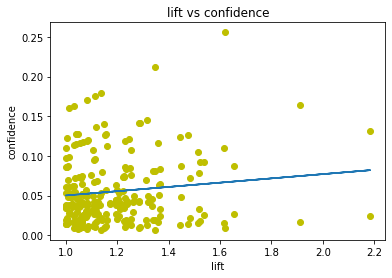

In [40]:
plot_metrics_relationship(apriori_rule_lift, col1='lift', col2='confidence')

In [41]:
apripri_rule = compute_association_rule(apriori_matrix, metric="confidence", min_thresh=0.2)
apripri_rule.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(rolls/buns, sausage)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,0.000292,1.069304
1,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541


# Comparative Analysis

Time Execution

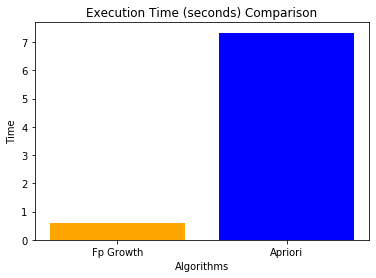

In [42]:
algo1 = ['Fp Growth', fp_growth_exec_time]
algo2 = ['Apriori', apriori_exec_time]
compare_time_exec(algo1, algo2)

## Thank you